### Question 11:
At first we import required libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import VarianceThreshold

Now we load the dataset into train and test parts.

In [14]:
train_data = np.loadtxt('TinyMNIST/trainData.csv', dtype = np.float32, delimiter = ',')
train_labels = np.loadtxt('TinyMNIST/trainLabels.csv', dtype = np.int32, delimiter = ',')
test_data = np.loadtxt('TinyMNIST/testData.csv', dtype = np.float32, delimiter = ',')
test_labels = np.loadtxt('TinyMNIST/testLabels.csv', dtype = np.int32, delimiter = ',')
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

Now we classify using a gaussian model and we get a bad accuracy around 51 percent.

In [31]:
clf = GaussianNB()
clf.fit(train_data, train_labels)
y_pred = clf.predict(test_data)
score = accuracy_score(test_labels, y_pred) * 100
print("Accuracy before PCA : %.2f" %score)

Accuracy before PCA : 50.68


Now we plot eigenvalues or variances covered by each principal component.

In [35]:
pca = PCA(n_components = train_data.shape[1])
pca.fit_transform(train_data)

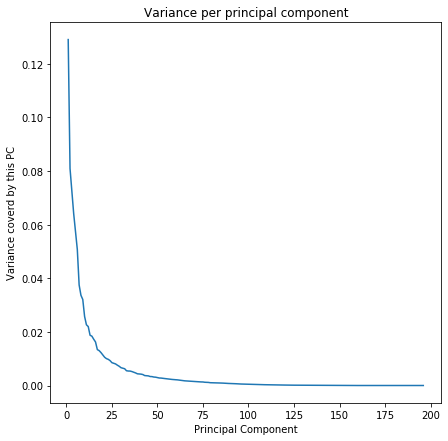

In [36]:
xs = np.array(range(1, train_data.shape[1] + 1))
plt.figure(figsize = (7, 7))
plt.plot(xs, pca.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Variance coverd by this PC')
plt.title("Variance per principal component")
plt.show()

It is obvious that 25 is the best number of components because variance stored in the next components is not worthy of the complexity that it adds to computation if we add them.

In [37]:
variance = 0
for i in range(25):
    variance = variance + pca.explained_variance_ratio_[i]
print('Variance for the first 25 PCs : %.4f' %var)

Variance for the first 25 PCs : 0.7974


In the last step we print the variance of these 25 components and implement the gaussian model on the data after PCA algorithm. We can see that we achieved an acceptable accuracy of 81% by this simpe preprocess.

In [40]:
pca = PCA(n_components = 25)
clf = GaussianNB()
clf.fit(pca.fit_transform(train_data), train_labels)
y_pred = clf.predict(pca.transform(test_data))
score = accuracy_score(test_labels, y_pred) * 100
print("Accuracy after PCA alghoritem with 25 PCs : %.2f" %score)

Accuracy after PCA alghoritem with 25 PCs : 81.00
